In [2]:
!pip install pyreadr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 417.0/417.0 kB 5.5 MB/s eta 0:00:00


In [3]:
#importo el archivo y verifico la matriz

from google.colab import files
import pyreadr

# Subir el archivo .RData o .RDS
uploaded = files.upload()

# Carga el archivo
result = pyreadr.read_r(list(uploaded.keys())[0])
# Toma el nombre del archivo subido
df = list(result.values())[0]

# Verificamos el DataFrame
print(df.head())


Saving nhanes.RData to nhanes.RData
      GE    Ed   Ge   AF   IMC    Glu  Diag    GLT     In
0  Adult  61.0  2.0  2.0  35.7  110.0   1.0  150.0  14.91
1  Adult  26.0  2.0  2.0  20.3   89.0   1.0   80.0   3.85
2  Adult  16.0  1.0  2.0  23.2   89.0   1.0   68.0   6.14
3  Adult  32.0  1.0  2.0  28.9  104.0   1.0   84.0  16.15
4  Adult  38.0  2.0  1.0  35.9  103.0   1.0   81.0  10.92


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [7]:
# Tipos de datos en cada columna
print("Tipos de datos:")
print(df.dtypes)

# Cantidad de filas y columnas
print("\nDimensiones del DataFrame:")
print(f"Filas: {df.shape[0]}, Columnas: {df.shape[1]}")


Tipos de datos:
GE       object
Ed      float64
Ge      float64
AF      float64
IMC     float64
Glu     float64
Diag    float64
GLT     float64
In      float64
dtype: object

Dimensiones del DataFrame:
Filas: 2278, Columnas: 9


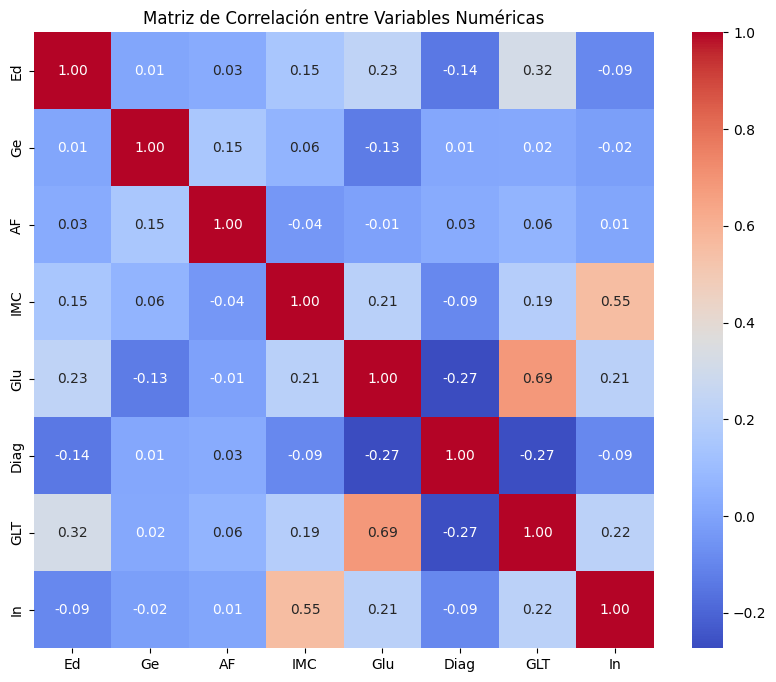

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionar solo columnas numéricas
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Calcular la matriz de correlación
correlation_matrix = df[numerical_cols].corr()

# Mostrar la matriz de correlación como un mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Matriz de Correlación entre Variables Numéricas")
plt.show()


# Ejercicio 1
En este ejercicio consideramos únicamente las siguientes 5 variables:
edad, índice de masa corporal, nivel de glucosa, glucosa total y nivel de insulina.

In [9]:
# variables de interés
selected_columns = ['Ed', 'IMC', 'Glu', 'GLT', 'In']
subset_df = df[selected_columns]

# verificar el nuevo DataFrame
print("Primeras filas del subconjunto de datos:")
print(subset_df.head())

# valores faltantes
print("\nResumen de valores faltantes:")
print(subset_df.isnull().sum())

# estadísticas descriptivas
print("\nEstadísticas descriptivas:")
print(subset_df.describe())


Primeras filas del subconjunto de datos:
     Ed   IMC    Glu    GLT     In
0  61.0  35.7  110.0  150.0  14.91
1  26.0  20.3   89.0   80.0   3.85
2  16.0  23.2   89.0   68.0   6.14
3  32.0  28.9  104.0   84.0  16.15
4  38.0  35.9  103.0   81.0  10.92

Resumen de valores faltantes:
Ed     0
IMC    0
Glu    0
GLT    0
In     0
dtype: int64

Estadísticas descriptivas:
                Ed          IMC          Glu          GLT           In
count  2278.000000  2278.000000  2278.000000  2278.000000  2278.000000
mean     41.795874    27.955180    99.553117   114.978929    11.834794
std      20.156111     7.248962    17.889834    47.061239     9.718812
min      12.000000    14.500000    63.000000    40.000000     0.140000
25%      24.000000    22.800000    91.000000    87.000000     5.860000
50%      41.000000    26.800000    97.000000   105.000000     9.040000
75%      58.000000    31.200000   104.000000   130.000000    14.440000
max      80.000000    70.100000   405.000000   604.000000   102.

##Parte 1.
Mediante un análisis de componentes principales, graficar el porcentaje de la
varianza explicada por cada componente y el porcentaje acumulado de la
 varianza explicada.

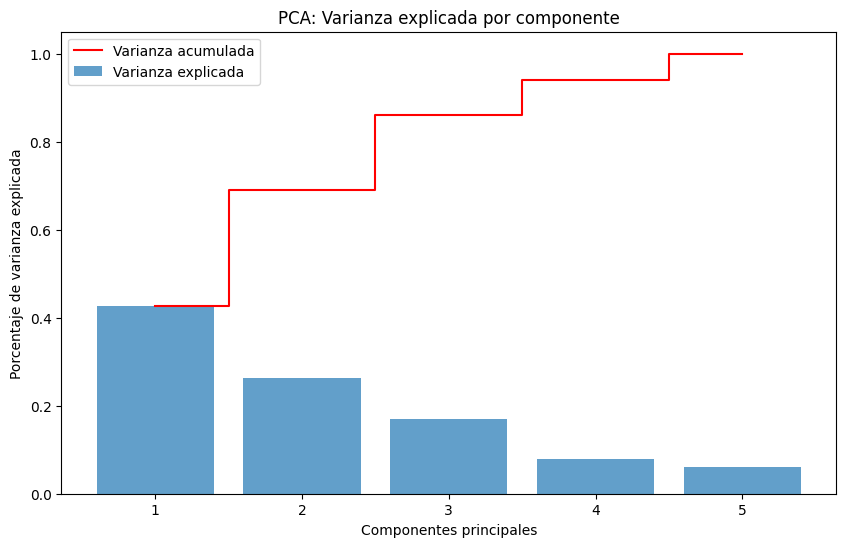

In [10]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

# variables seleccionadas
selected_columns = ['Ed', 'IMC', 'Glu', 'GLT', 'In']
subset_df = df[selected_columns]


# Estandarizar los datos
scaler = StandardScaler()
standardized_data = scaler.fit_transform(subset_df)

# Aplicar PCA
pca = PCA()
pca.fit(standardized_data)
explained_variance_ratio = pca.explained_variance_ratio_

# Calcular varianza acumulada
cumulative_variance = np.cumsum(explained_variance_ratio)

# Graficar el porcentaje de varianza explicada
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.7, align='center', label='Varianza explicada')
plt.step(range(1, len(cumulative_variance) + 1), cumulative_variance, where='mid', label='Varianza acumulada', color='red')
plt.xlabel('Componentes principales')
plt.ylabel('Porcentaje de varianza explicada')
plt.title('PCA: Varianza explicada por componente')
plt.legend(loc='best')
plt.show()


In [11]:
import pandas as pd

# coeficientes de los primeros 3 componentes principales
components = pd.DataFrame(
    pca.components_[:3, :],
    columns=subset_df.columns,
    index=['Componente 1', 'Componente 2', 'Componente 3']
)

# tabla con el porcentaje de varianza explicada
explained_variance_df = pd.DataFrame({
    "Componente": [f"Componente {i+1}" for i in range(3)],
    "Varianza Explicada (%)": np.round(explained_variance_ratio[:3] * 100, 2),
    "Varianza Acumulada (%)": np.round(cumulative_variance[:3] * 100, 2)
})

print("Matriz de coeficientes de los primeros 3 componentes principales:")
print(components)

print("\nPorcentaje de varianza explicada (primeros 3 componentes):")
print(explained_variance_df)


Matriz de coeficientes de los primeros 3 componentes principales:
                    Ed       IMC       Glu       GLT        In
Componente 1  0.286243  0.417884  0.539243  0.550846  0.386295
Componente 2 -0.455247  0.498118 -0.266529 -0.310936  0.613929
Componente 3  0.773575  0.406440 -0.392960 -0.278202 -0.067638

Porcentaje de varianza explicada (primeros 3 componentes):
     Componente  Varianza Explicada (%)  Varianza Acumulada (%)
0  Componente 1                   42.71                   42.71
1  Componente 2                   26.29                   69.00
2  Componente 3                   17.09                   86.09


## Parte 2.
Realizar un biplot.

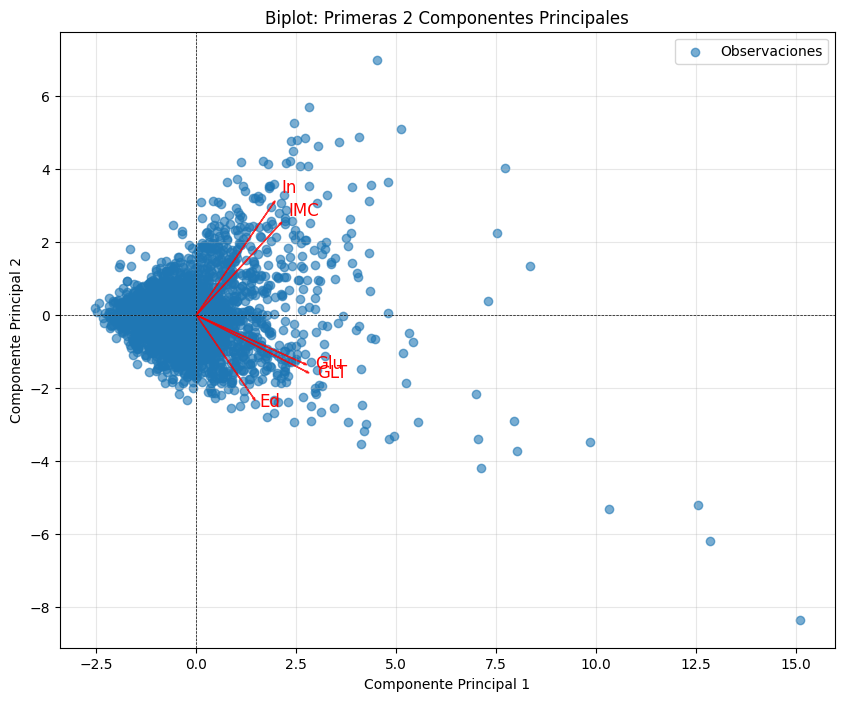

In [14]:
import matplotlib.pyplot as plt
import numpy as np

def biplot(scores, loadings, variable_names, scale=1):
    """
    biplot con las observaciones y vectores de las variables.

    :param scores: Proyecciones de las observaciones en el espacio de las componentes principales.
    :param loadings: Coeficientes de las variables en el espacio de las componentes principales.
    :param variable_names: Nombres de las variables originales.
    :param scale: Factor de escala para los vectores de las variables.
    """
    plt.figure(figsize=(10, 8))

    # Graficar las observaciones
    plt.scatter(scores[:, 0], scores[:, 1], alpha=0.6, label="Observaciones")

    # Graficar los vectores de las variables
    for i, var_name in enumerate(variable_names):
        plt.arrow(0, 0, scale * loadings[i, 0], scale * loadings[i, 1],
                  color='red', head_width=0.05, alpha=0.8)
        plt.text(scale * loadings[i, 0] * 1.1, scale * loadings[i, 1] * 1.1,
                 var_name, color='red', fontsize=12)

    # Configurar el gráfico
    plt.xlabel("Componente Principal 1")
    plt.ylabel("Componente Principal 2")
    plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
    plt.axvline(0, color='black', linewidth=0.5, linestyle='--')
    plt.title("Biplot: Primeras 2 Componentes Principales")
    plt.grid(alpha=0.3)
    plt.legend()
    plt.show()

# Calcular las proyecciones y cargas
scores = pca.transform(standardized_data)
loadings = pca.components_.T

# Crear el biplot
variable_names = subset_df.columns
biplot(scores, loadings, variable_names, scale=5)


## Parte 4.
 ¿Cómo se interpretan los datos 1225 y 893?

In [15]:
# Coordenadas de las observaciones en el espacio de las primeras dos componentes principales
observaciones_interes = [1225, 893]
scores_observaciones = scores[observaciones_interes, :2]

# Mostrar las coordenadas
for i, obs in enumerate(observaciones_interes):
    print(f"Observación {obs}: PC1 = {scores_observaciones[i, 0]:.2f}, PC2 = {scores_observaciones[i, 1]:.2f}")


Observación 1225: PC1 = -1.17, PC2 = 0.63
Observación 893: PC1 = -0.05, PC2 = 0.33


# Ejercicio 2
En este ejercicio seguimos trabajando con las 5 variables del
ejercicio anterior.



1-¿Existen indicios de agrupamiento entre las observaciones?



In [16]:
import numpy as np
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler

def hopkins_statistic(X, sample_size=None):
    """
    Calcula el estadístico de Hopkins para evaluar si los datos tienen tendencia a formar agrupamientos.

    :param X: Matriz de datos (observaciones x variables).
    :param sample_size: Número de muestras a tomar (opcional; por defecto es el 10% del total de observaciones).
    :return: Valor del estadístico de Hopkins.
    """
    if sample_size is None:
        sample_size = int(0.1 * X.shape[0])  # tomo el 10% de las observaciones como muestra

    # Estandarizar los datos
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Seleccionar una muestra aleatoria de puntos del conjunto de datos
    random_indices = np.random.choice(range(X_scaled.shape[0]), sample_size, replace=False)
    X_sample = X_scaled[random_indices]

    # Generar puntos aleatorios dentro del mismo rango
    min_vals = np.min(X_scaled, axis=0)
    max_vals = np.max(X_scaled, axis=0)
    random_points = np.random.uniform(min_vals, max_vals, (sample_size, X_scaled.shape[1]))

    # Calcular distancias de vecinos más cercanos
    nbrs = NearestNeighbors(n_neighbors=1).fit(X_scaled)
    u_distances, _ = nbrs.kneighbors(random_points)  # Distancias de puntos aleatorios
    w_distances, _ = nbrs.kneighbors(X_sample)      # Distancias de puntos reales

    # Estadístico de Hopkins
    u_sum = np.sum(u_distances)
    w_sum = np.sum(w_distances)
    hopkins = u_sum / (u_sum + w_sum)

    return hopkins

# Calcular el estadístico de Hopkins para las 5 variables seleccionadas
selected_columns = ['Ed', 'IMC', 'Glu', 'GLT', 'In']
X = subset_df[selected_columns].dropna().values  # Asegurarse de que no haya valores faltantes
hopkins = hopkins_statistic(X)

print(f"Estadístico de Hopkins: {hopkins:.4f}")


Estadístico de Hopkins: 1.0000


2-Asumiendo que existen agrupamientos entre las observaciones, indicar de
acuerdo a determinado criterio en cuántos grupos es razonable separar utlizando los criterios de Silhouette y Dunn. En cada caso utilizar como métodos de agrupamiento kmeans y Ward.

In [17]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import pdist
import matplotlib.pyplot as plt



Método: KMeans
  - Clusters: 2 | Silhouette: 0.3537 | Índice de Dunn: 0.0041
  - Clusters: 3 | Silhouette: 0.2808 | Índice de Dunn: 0.0052
  - Clusters: 4 | Silhouette: 0.2874 | Índice de Dunn: 0.0052
  - Clusters: 5 | Silhouette: 0.2702 | Índice de Dunn: 0.0070
  - Clusters: 6 | Silhouette: 0.2695 | Índice de Dunn: 0.0070
  - Clusters: 7 | Silhouette: 0.2521 | Índice de Dunn: 0.0078
  - Clusters: 8 | Silhouette: 0.1948 | Índice de Dunn: 0.0095
  - Clusters: 9 | Silhouette: 0.2127 | Índice de Dunn: 0.0106


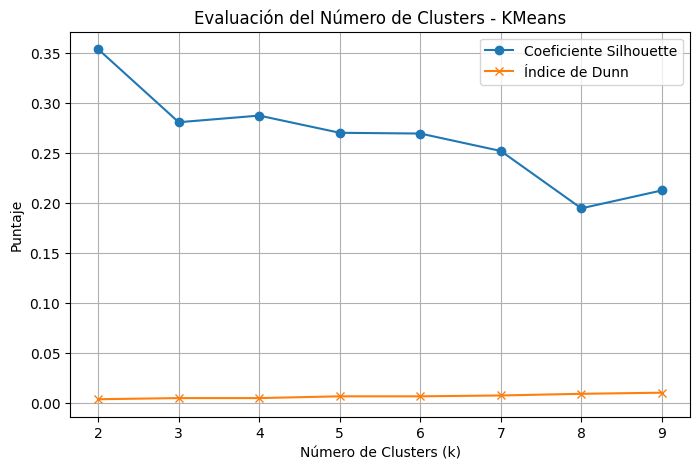


Método: Ward
  - Clusters: 2 | Silhouette: 0.3736 | Índice de Dunn: 0.0041
  - Clusters: 3 | Silhouette: 0.3541 | Índice de Dunn: 0.0044
  - Clusters: 4 | Silhouette: 0.3180 | Índice de Dunn: 0.0078
  - Clusters: 5 | Silhouette: 0.1800 | Índice de Dunn: 0.0078
  - Clusters: 6 | Silhouette: 0.1916 | Índice de Dunn: 0.0078
  - Clusters: 7 | Silhouette: 0.1951 | Índice de Dunn: 0.0078
  - Clusters: 8 | Silhouette: 0.1827 | Índice de Dunn: 0.0078
  - Clusters: 9 | Silhouette: 0.1867 | Índice de Dunn: 0.0078


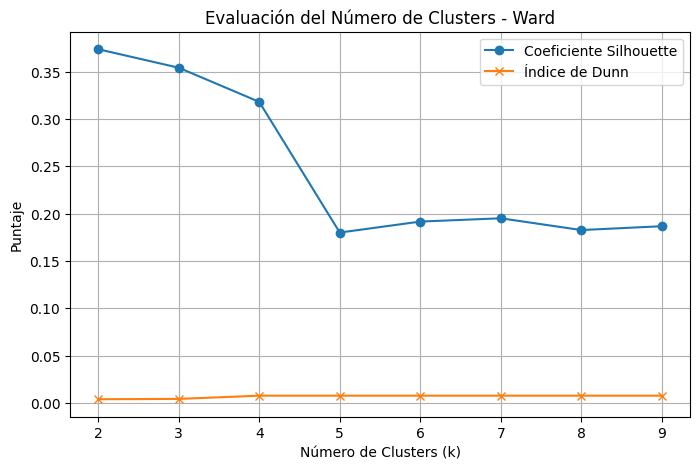

In [18]:
# Función para calcular el índice de Dunn
def calcular_indice_dunn(X, labels):
    """
    Calcula el Índice de Dunn: relación entre la mínima distancia entre clusters
    y la máxima dispersión dentro de un cluster.
    """
    distances = pairwise_distances(X)
    unique_labels = np.unique(labels)
    intra_cluster_distances = []
    inter_cluster_distances = []

    # Calcular dispersión máxima dentro de los clusters
    for label in unique_labels:
        cluster_points = X[labels == label]
        if len(cluster_points) > 1:
            intra_cluster_distances.append(np.max(pdist(cluster_points)))

    # Calcular distancia mínima entre clusters
    for i in range(len(unique_labels)):
        for j in range(i + 1, len(unique_labels)):
            cluster_i = X[labels == unique_labels[i]]
            cluster_j = X[labels == unique_labels[j]]
            inter_cluster_distances.append(np.min(pdist(np.vstack([cluster_i, cluster_j]))))

    dunn_index = np.min(inter_cluster_distances) / np.max(intra_cluster_distances)
    return dunn_index

# Seleccionar las 5 variables del ejercicio anterior y escalar los datos
selected_columns = ['Ed', 'IMC', 'Glu', 'GLT', 'In']
X = subset_df[selected_columns].dropna().values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Rango de número de clusters a evaluar
range_clusters = range(2, 10)

# Métodos de agrupamiento
metodos = {
    "KMeans": KMeans,
    "Ward": AgglomerativeClustering
}

# Evaluar cada método
for metodo_nombre, metodo in metodos.items():
    silhouette_scores = []
    dunn_indices = []
    print(f"\nMétodo: {metodo_nombre}")
    for k in range_clusters:
        if metodo_nombre == "KMeans":
            model = metodo(n_clusters=k, random_state=42).fit(X_scaled)
        elif metodo_nombre == "Ward":
            model = metodo(n_clusters=k, linkage='ward').fit(X_scaled)

        labels = model.labels_
        silhouette = silhouette_score(X_scaled, labels)
        dunn = calcular_indice_dunn(X_scaled, labels)

        silhouette_scores.append(silhouette)
        dunn_indices.append(dunn)

        print(f"  - Clusters: {k} | Silhouette: {silhouette:.4f} | Índice de Dunn: {dunn:.4f}")

    # Graficar los resultados
    plt.figure(figsize=(8, 5))
    plt.plot(range_clusters, silhouette_scores, marker='o', label='Coeficiente Silhouette')
    plt.plot(range_clusters, dunn_indices, marker='x', label='Índice de Dunn')
    plt.title(f"Evaluación del Número de Clusters - {metodo_nombre}")
    plt.xlabel("Número de Clusters (k)")
    plt.ylabel("Puntaje")
    plt.legend()
    plt.grid(True)
    plt.show()

3- Eligiendo un número de k adecuado separar en clusters usando kmeans.

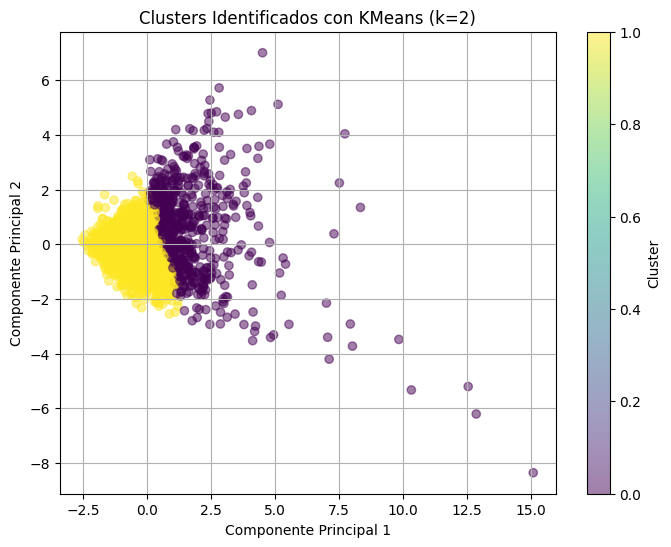

In [22]:
from sklearn.decomposition import PCA

# 1. Aplicar KMeans con el k óptimo
k_optimo = 2  # Basado en los resultados anteriores
kmeans = KMeans(n_clusters=k_optimo, random_state=42)
labels_kmeans = kmeans.fit_predict(X_scaled)

# 2. Reducir la dimensionalidad con PCA para graficar los clusters
pca = PCA(n_components=2)  # Reducir a 2 componentes principales
X_pca = pca.fit_transform(X_scaled)

# 3. Graficar los clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_kmeans, cmap='viridis', alpha=0.5)
plt.title(f"Clusters Identificados con KMeans (k={k_optimo})")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()



# Ejercicio 3
En este ejercicio vamos a predecir (mediante varios métodos) la presencia o no
de diabetes a partir de las 5 variables consideradas en los ejercicios anteriores.
Para ello separamos el total de observaciones en  80 por ciento de
entrenamiento y el 20 por ciento restante para calcular el porcentaje de error
(error rate).

1- Ajustar un modelo logístico y calcular la matriz de confusión.

2- Aplicar KNN con k= 5, k=10 y calcular la matriz de confusión.

3- Aplicar LDA y calcular la matriz de confusión.

4- Aplicar QDA y calcular la matriz de confusión.

5- Aplicar naive Bayes y calcular la matriz de confusión.

6- Aplicar random forests y calcular la matriz de confusión.

7- Graficar las curvas ROC para los distintos métodos de clasificación utilizados.

8- Comentar los resultados obtenidos.

In [23]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt

In [27]:
# Seleccionar las variables de interés
selected_columns = ['Ed', 'IMC', 'Glu', 'GLT', 'In','Diag']
subset_df = df[selected_columns]

In [28]:
# Dividir en datos de entrenamiento (80%) y prueba (20%)
X = subset_df.iloc[:, :-1]  # Todas las variables menos 'Diag'
y = subset_df['Diag']     # La última columna es la variable objetivo

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

# Función para evaluar modelos y mostrar matriz de confusión con etiquetas
def evaluar_modelo(modelo, X_train, X_test, y_train, y_test, nombre_modelo):
    """
    Ajusta, predice y muestra la matriz de confusión con etiquetas y el accuracy.
    """
    modelo.fit(X_train, y_train)  # Ajustar modelo
    y_pred = modelo.predict(X_test)  # Predicción

    # Matriz de confusión
    cm = confusion_matrix(y_test, y_pred)
    acc = accuracy_score(y_test, y_pred)

    print(f"\n--- {nombre_modelo} ---")
    print(f"Accuracy: {acc:.4f}")

    # Graficar matriz de confusión con etiquetas
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Clase 0", "Clase 1"],
                yticklabels=["Clase 0", "Clase 1"])
    plt.title(f"Matriz de Confusión - {nombre_modelo}")
    plt.xlabel("Predicción")
    plt.ylabel("Valor Real")
    plt.show()

    return y_pred, modelo

# Escalar datos para métodos que lo requieren (KNN, LDA, QDA)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


1. Regresión Logística:

--- Regresión Logística ---
Accuracy: 0.9605


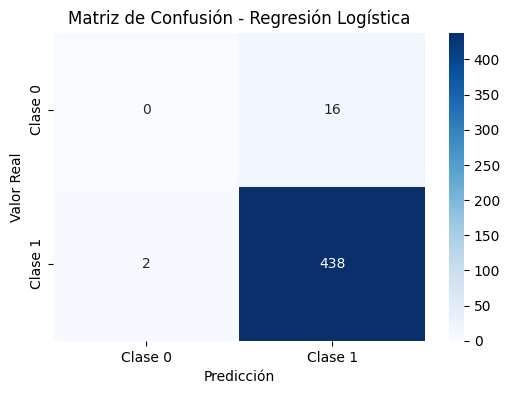

In [30]:
# Regresión Logística // no uso V9 porque es la Y
print("\n1. Regresión Logística:")
X_train_log = X_train[['Ed', 'IMC', 'Glu', 'GLT', 'In']]
X_test_log = X_test[['Ed', 'IMC', 'Glu', 'GLT', 'In']]

logistic_model = LogisticRegression()
y_pred_log, logistic_model = evaluar_modelo(logistic_model, X_train_scaled, X_test_scaled, y_train, y_test, "Regresión Logística")




2. KNN:

--- KNN (k=5) ---
Accuracy: 0.9583


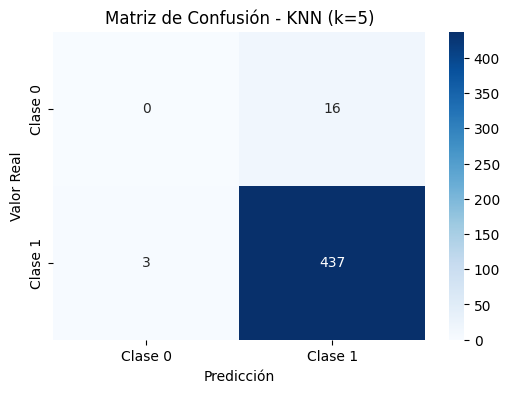


--- KNN (k=10) ---
Accuracy: 0.9649


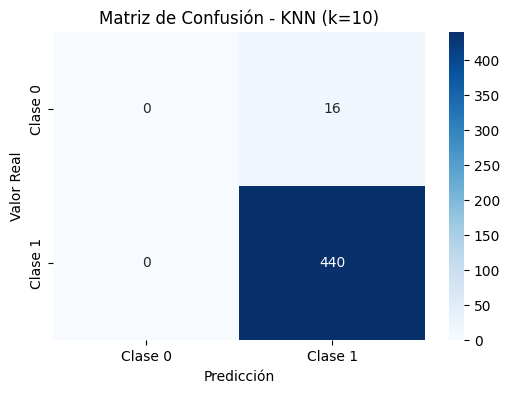

In [41]:
print("\n2. KNN:")
for k in [5,10]:
    knn_model = KNeighborsClassifier(n_neighbors=k)
    evaluar_modelo(knn_model, X_train_scaled, X_test_scaled, y_train, y_test, f"KNN (k={k})")



3. LDA:

--- LDA ---
Accuracy: 0.9474


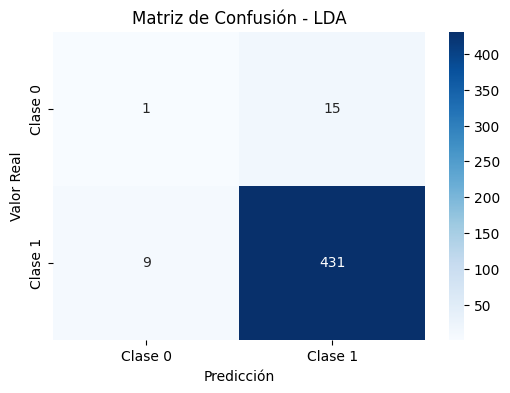

In [36]:
# 4. LDA
print("\n3. LDA:")
X_train_lda = X_train[['Ed', 'IMC', 'Glu', 'GLT', 'In']]
X_test_lda = X_test[['Ed', 'IMC', 'Glu', 'GLT', 'In']]

lda_model = LDA()
y_pred_lda, lda_model = evaluar_modelo(lda_model, X_train_lda, X_test_lda, y_train, y_test, "LDA")



4. QDA:

--- QDA ---
Accuracy: 0.9430


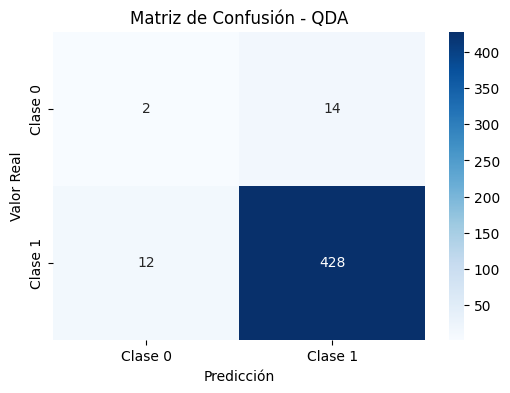

In [37]:
# 5. QDA
print("\n4. QDA:")
X_train_qda = X_train[['Ed', 'IMC', 'Glu', 'GLT', 'In']]
X_test_qda = X_test[['Ed', 'IMC', 'Glu', 'GLT', 'In']]

qda_model = QDA()
y_pred_qda, qda_model = evaluar_modelo(qda_model, X_train_qda, X_test_qda, y_train, y_test, "QDA")



5. Naive Bayes:

--- Naive Bayes ---
Accuracy: 0.9386


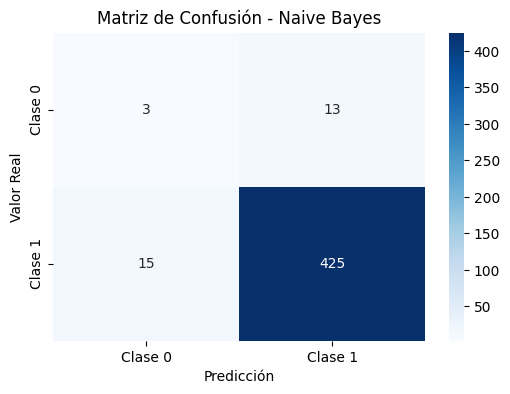

In [38]:
# 6. Naive Bayes
print("\n5. Naive Bayes:")
naive_bayes_model = GaussianNB()
y_pred_nb, naive_bayes_model = evaluar_modelo(naive_bayes_model, X_train, X_test, y_train, y_test, "Naive Bayes")



6. Random Forest:

--- Random Forest ---
Accuracy: 0.9539


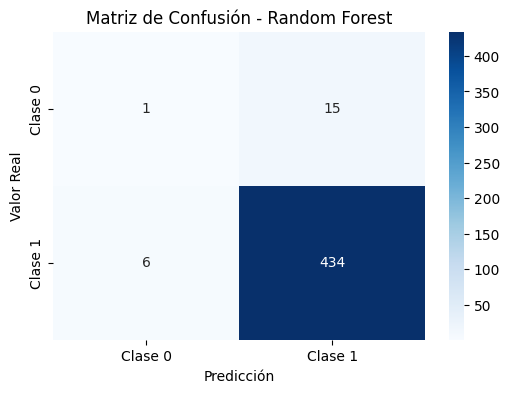

In [39]:
# 7. Random Forest
print("\n6. Random Forest:")
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
y_pred_rf, random_forest_model = evaluar_modelo(random_forest_model, X_train, X_test, y_train, y_test, "Random Forest")


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


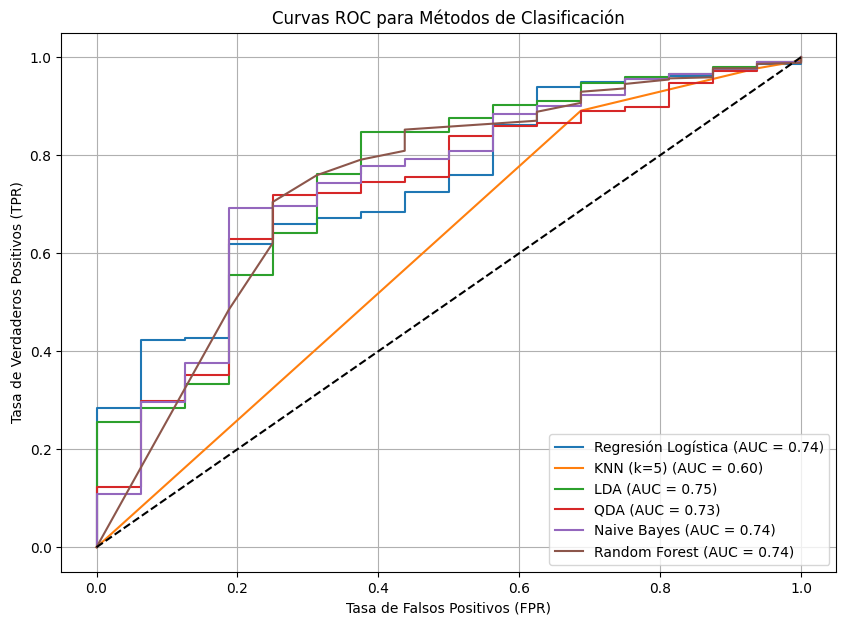

In [40]:
# 8. Graficar curvas ROC
plt.figure(figsize=(10, 7))

# Función para graficar la curva ROC
def graficar_roc(modelo, X_test, y_test, nombre_modelo):
    y_prob = modelo.predict_proba(X_test)[:, 1] if hasattr(modelo, "predict_proba") else modelo.decision_function(X_test)
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    auc_score = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{nombre_modelo} (AUC = {auc_score:.2f})')

# Graficar curvas ROC para todos los modelos
graficar_roc(logistic_model, X_test_log, y_test, "Regresión Logística")
graficar_roc(KNeighborsClassifier(n_neighbors=5).fit(X_train_scaled, y_train), X_test_scaled, y_test, "KNN (k=5)")
graficar_roc(lda_model, X_test_lda, y_test, "LDA")
graficar_roc(qda_model, X_test_qda, y_test, "QDA")
graficar_roc(naive_bayes_model, X_test, y_test, "Naive Bayes")
graficar_roc(random_forest_model, X_test, y_test, "Random Forest")

# Configuración de la gráfica ROC
plt.plot([0, 1], [0, 1], 'k--')  # Línea diagonal
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curvas ROC para Métodos de Clasificación')
plt.legend()
plt.grid(True)
plt.show()